Retrieving data from HKMA api

Click below cell, press "shift" + "enter",
or, click the run button

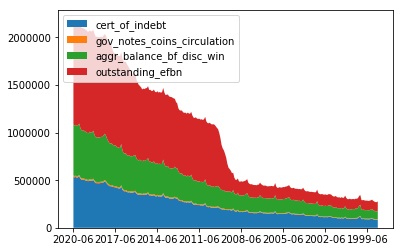

In [3]:
import urllib.request
import json
import numpy as np
import matplotlib.pyplot as plt
import ssl
context = ssl._create_unverified_context()

# Monetary Base Data released by hkma monthly
url = 'https://api.hkma.gov.hk/public/market-data-and-statistics/monthly-statistical-bulletin/monetary-operation/monetary-base-endperiod'

records = []

# retrieve data from hkma api, 100 entries per call, untill every data are retrieveed
offset = 0
while True:
    with urllib.request.urlopen(url+"?offset="+str(offset), context=context) as req:
        data = json.loads(req.read().decode())
        records += data['result']['records']
    if data['result']['datasize'] <= 0:
        break
    else:
        offset += 100


formattedX = []
formatted_cert_of_indebt = []
formatted_gov_notes_coins_circulation = []
formatted_aggr_balance_bf_disc_win = []
formatted_outstanding_efbn = []
formattedY = []

for record in records:
    formattedX += [record['end_of_month']]

    # cert_of_indebt
    formatted_cert_of_indebt += [record['cert_of_indebt']]

    # gov_notes_coins_circulation
    formatted_gov_notes_coins_circulation += [record['gov_notes_coins_circulation']]

    # aggr_balance_bf_disc_win
    formatted_aggr_balance_bf_disc_win += [record['aggr_balance_bf_disc_win']]

    # outstanding_efbn
    formatted_outstanding_efbn += [record['outstanding_efbn']]

formattedY = [formatted_cert_of_indebt, formatted_gov_notes_coins_circulation, formatted_cert_of_indebt, formatted_outstanding_efbn]

# Plot
plt.stackplot(formattedX, formattedY, labels=['cert_of_indebt','gov_notes_coins_circulation', 'aggr_balance_bf_disc_win', 'outstanding_efbn'])
plt.xticks(['2020-06', '2016-06', '2012-06', '2008-06', '2004-06', '2000-06', '1998-09'])
plt.legend(loc='upper left')
plt.show()